# $^{222}\text{Rn}$-$\alpha$ in $\text{Xe}$

Control plots for a selected run.

In [29]:
import sys
sys.path.append('/data_extra2/ccortesp/NEXT-100/Xe_cmmssnng/')

import crudo
import fit_functions as ff
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotting_tools as pt
import tables as tb
from   scipy.optimize import curve_fit

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Runs Information

In [ ]:
# Select the type of scan in your comparison. If it is needed.
# scan, scan_key = "EL", "EL_HV"
# scan, scan_key = "Cathode", "cath_HV"

# Define the runs to be analyzed
runs_info = [
                # # Drift field scan: Oct 2024
                # {"run_number": 14440, "cath_HV": 18e3, "EL_HV": 6e3, "duration": 42952},
                # {"run_number": 14456, "cath_HV": 19e3, "EL_HV": 6e3, "duration": 56420},
                # {"run_number": 14468, "cath_HV": 20e3, "EL_HV": 6e3, "duration": 55696},
                # {"run_number": 14484, "cath_HV": 21e3, "EL_HV": 6e3, "duration": 48240},
                # {"run_number": 14489, "cath_HV": 22e3, "EL_HV": 6e3, "duration": 42314},
                # {"run_number": 14498, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 43161},
                # {"run_number": 14519, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 43274},
                # {"run_number": 14522, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 42801},
                # # Gas recirculation: Nov 2024
                # {"run_number": 14581, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 76086},
                # {"run_number": 14582, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 79541},
                # {"run_number": 14588, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 55856},
                # # EL voltage scan: Dic 2024
                # {"run_number": 14601, "cath_HV": 23e3, "EL_HV": 7e3, "duration": 77537},
                # {"run_number": 14608, "cath_HV": 23e3, "EL_HV": 8e3, "duration": 86414},
                # {"run_number": 14704, "cath_HV": 23e3, "EL_HV": 9e3, "duration": 52765},
                # # EL voltage scan: Jan 2025
                # {"run_number": 14714, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 64527},
                # {"run_number": 14720, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 48518},
                # {"run_number": 14733, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 53881},
                # {"run_number": 14735, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 84987},
                # {"run_number": 14737, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 72705},
                # {"run_number": 14739, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 87138},
                # {"run_number": 14741, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 87755},
                # {"run_number": 14743, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 82332},
    
                # # # # #  A L P H A   R U N S # # # # #
    
                # Jan 2025
                # {"run_number": 14714, "duration": 64527, "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14715, "duration": 84365, "OK": 2469062, "LOST": 2239303, "real_rate": 55.809},  # NO processed
                # {"run_number": 14716, "duration": 17036, "OK": 495769 , "LOST": 451306 , "real_rate": 55.592},
                # {"run_number": 14720, "duration": 48518, "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14733, "duration": 53881, "OK": 1587637, "LOST": 1429629, "real_rate": 55.998},
                # {"run_number": 14735, "duration": 84987, "OK": 2508569, "LOST": 2267982, "real_rate": 56.203},
                # {"run_number": 14737, "duration": 72705, "OK": 2153786, "LOST": 1960347, "real_rate": 56.586},
                {"run_number": 14739, "duration": 87138, "OK": 2576630, "LOST": 2334343, "real_rate": 56.358},
                # {"run_number": 14741, "duration": 87755, "OK": 2592615, "LOST": 2349583, "real_rate": 56.318},
                # {"run_number": 14743, "duration": 82332, "OK": 2437984, "LOST": 2220643, "real_rate": 56.583},
                # {"run_number": 14745, "duration": 60990, "OK": 1803415, "LOST": 1636317, "real_rate": 56.398},
                # --- NO Cold Getter: Jan 27 --- #
                # {"run_number": 14753, "duration": 86308, "OK": 2188547, "LOST": 1532351, "real_rate": 43.111},
                # {"run_number": 14765, "duration": 55978, "OK": 1259832, "LOST": 735202 , "real_rate": 35.639},
                # {"run_number": 14776, "duration": 47397, "OK": 957081 , "LOST": 481810 , "real_rate": 30.358},  # NO processed
                # {"run_number": 14780, "duration": 88503, "OK": 1600797, "LOST": 682246 , "real_rate": 25.796},  # NO processed
                # Feb 2025
                # {"run_number": 14782, "duration": 85654, "OK": 1382153, "LOST": 506234 , "real_rate": 22.046},
                # {"run_number": 14784, "duration": 57290, "OK": 842541 , "LOST": 273581 , "real_rate": 19.481},
                # {"run_number": 14789, "duration": 74148, "OK": 976360 , "LOST": 277504 , "real_rate": 16.910},
                # --- Zero Suppression --- #
                # {"run_number": 14803, "duration": 71721, "OK": 933727 , "LOST": 104677 , "real_rate": 14.478},
                # {"run_number": 14804, "duration": 65116, "OK": 680552 , "LOST": 156995 , "real_rate": 12.862},
                # --- NO ZS --- #
                # {"run_number": 14811, "duration": -1   , "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14814, "duration": 6344 , "OK": 55679  , "LOST": 10155  , "real_rate": 10.377},
                # {"run_number": 14815, "duration": 86232, "OK": 717786 , "LOST": 121527 , "real_rate": 9.733 },
                # {"run_number": 14816, "duration": 86580, "OK": 659265 , "LOST": 101374 , "real_rate": 8.785 },
                # {"run_number": 14817, "duration": 49662, "OK": 352203 , "LOST": 50474  , "real_rate": 8.108 },  
                # {"run_number": 14828, "duration": 53609, "OK": 300827 , "LOST": 100405 , "real_rate": 7.484 },
                # {"run_number": 14829, "duration": 73042, "OK": 387003 , "LOST": 121249 , "real_rate": 6.958 },
                # {"run_number": 14834, "duration": 5779 , "OK": 32864  , "LOST": 3887   , "real_rate": 6.359 },
                # {"run_number": 14835, "duration": 11713, "OK": 66515  , "LOST": 7358   , "real_rate": 6.306 },
                # {"run_number": 14837, "duration": 55751, "OK": 294175 , "LOST": 31034  , "real_rate": 5.833 },
                # {"run_number": 14838, "duration": 87854, "OK": 431766 , "LOST": 42219  , "real_rate": 5.395 },
                # {"run_number": 14839, "duration": 84881, "OK": 401004 , "LOST": 37747  , "real_rate": 5.169 },
                # {"run_number": 14840, "duration": 55363, "OK": -1     , "LOST": -1     , "real_rate": -1    },  
            ]

### Selected Data

In [ ]:
# Dataframe name
df_name = 'alpha_runs'

In [ ]:
# Open the file with selected data
with open(f"/data_extra2/ccortesp/NEXT-100/Xe_cmmssnng/data/{df_name}.pkl", "rb") as file:
    data = pickle.load(file)
    
# print(f"Ahí tiene su data, mi rey... \nRuns: {data.keys()}")

# This is the number of events you work with
print('Available statistic...')
for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    
    print(f'Run {run_id}: {data[run_id].shape[0]} events')

Available statistic...
Run 14739: 72721 events


#### Active volume and cathode surroundings masks!

In [ ]:
# Time mask
DT_stop = {run["run_number"]: crudo.cathode_position(run, data, step_back=1)[run["run_number"]] for run in runs_info}
# Active volume
AV_mask = {run["run_number"]: (
                                (data[run["run_number"]]['DT'] >= 0) 
                              & (data[run["run_number"]]['DT'] < DT_stop[run["run_number"]])
                              ) 
           for run in runs_info}
# Cathode surroundings
cath_mask = {run["run_number"]: data[run["run_number"]]['DT'] >= DT_stop[run["run_number"]] for run in runs_info}      

Run 14739: DT_stop = 1319.83 μs


## Base Distributions (with cuts)

### Radial distribution

#### Active volume

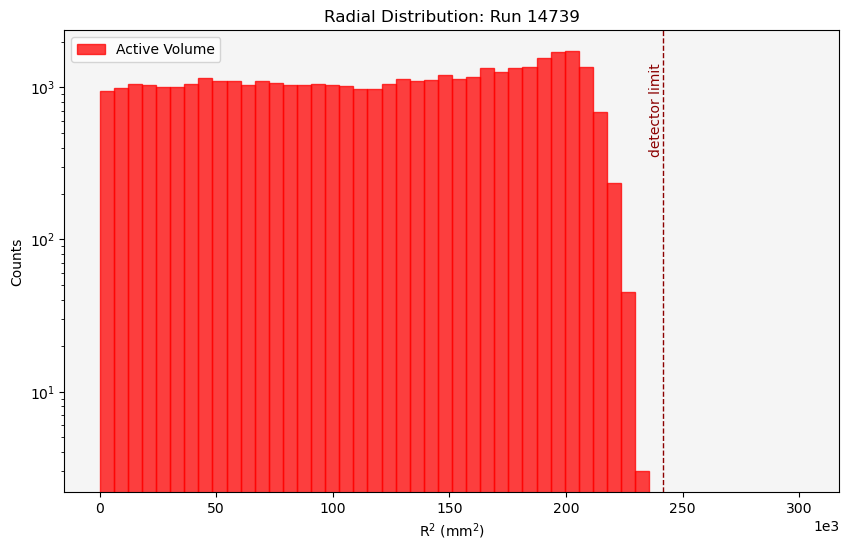

In [34]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    R2 = data[run_id]['X']**2 + data[run_id]['Y']**2
    
    # Masking
    R2_mask = R2[AV_mask[run_id]]
    
    # Histogram
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(R2_mask, bins=n_bins, range=(0, 1.25*pt.N100_rad**2), density=False, 
                               color=pt.hist_colors[(i + 1) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 1) % len(pt.hist_colors)], lw=1.0, label=f'Active Volume')
    
    # Plot
    plt.xlabel('R$^{2}$ (mm$^{2}$)')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.title(f'Radial Distribution: Run {run_id}')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
    plt.legend(loc='upper left')
    # Radial limit
    plt.axvline(x=pt.N100_rad**2, c='darkred', ls='--', lw=1)
    plt.text(pt.N100_rad**2, 0.75*counts[0], 'detector limit', c='darkred', va='center',  ha='right',  rotation=90)

    plt.gca().set_facecolor("whitesmoke")
    # plt.grid(True)
    # plt.tight_layout()
    plt.show()

#### Cathode surface

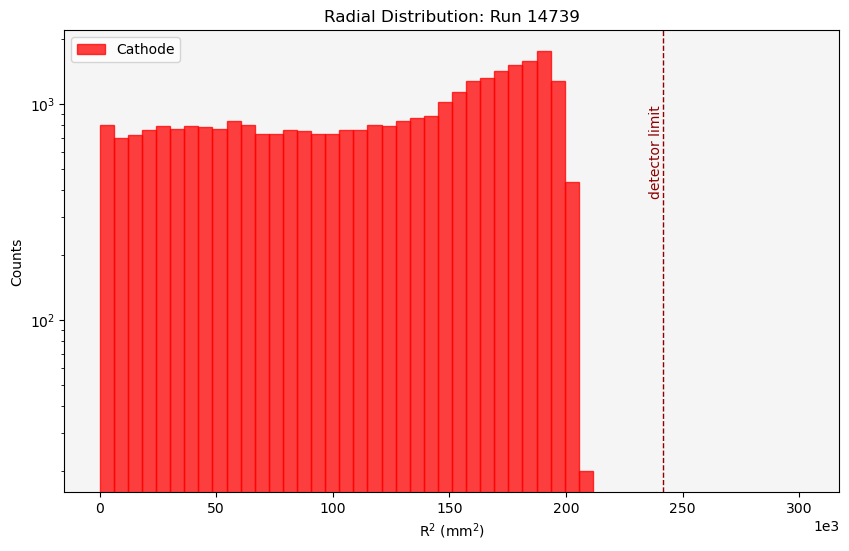

In [35]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    R2 = data[run_id]['X']**2 + data[run_id]['Y']**2
    
    # Masking
    R2_mask = R2[cath_mask[run_id]]
    
    # Histogram
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(R2_mask, bins=n_bins, range=(0, 1.25*pt.N100_rad**2), density=False, 
                               color=pt.hist_colors[(i + 1) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 1) % len(pt.hist_colors)], lw=1.0, label=f'Cathode')
    
    # Plot
    plt.xlabel('R$^{2}$ (mm$^{2}$)')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.title(f'Radial Distribution: Run {run_id}')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
    plt.legend(loc='upper left')
    # Radial limit
    plt.axvline(x=pt.N100_rad**2, c='darkred', ls='--', lw=1)
    plt.text(pt.N100_rad**2, 0.75*counts[0], 'detector limit', c='darkred', va='center',  ha='right',  rotation=90)

    plt.gca().set_facecolor("whitesmoke")
    # plt.grid(True)
    # plt.tight_layout()
    plt.show()

### DT distribution

How many outliers have gone?

Run 14739
Cathode time position = (1349.57 +/- 8.99) μs
Drift velocity = (0.87 +/- 0.01) mm/μs 



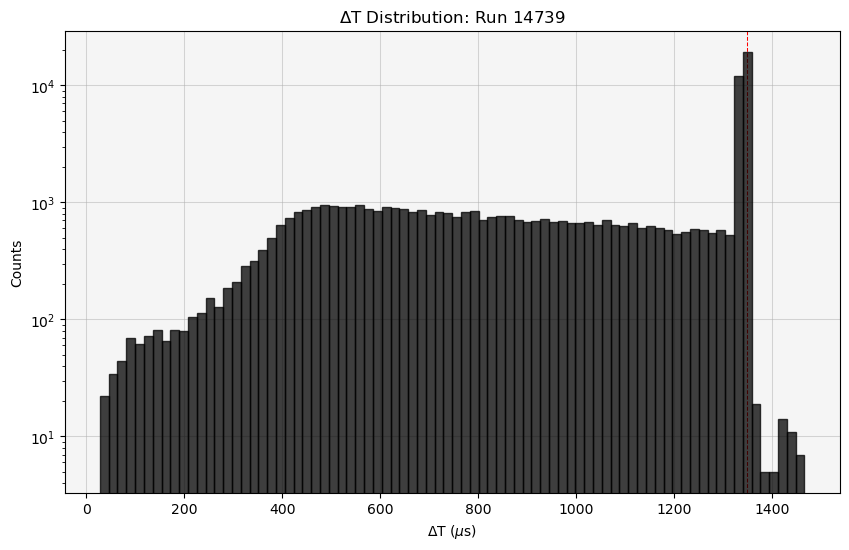

In [36]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    DT = data[run_id]['DT']

    # Histogram: careful! positive range is just for practical purposes
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(DT, bins=n_bins, range=(DT.min(), DT.max()), density=False, 
                               color=pt.hist_colors[i % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[i % len(pt.hist_colors)], lw=1.0, zorder=3)
    
    # Estimated cathode time position + error
    cath_index   = np.argmax(counts)                                                     # Index of the bin with the highest count
    cath_central = (bins[cath_index] + bins[cath_index + 1]) / 2 
    cath_error   = (bins[1] - bins[0]) / 2 
    # Drift velocity + error
    drift_vel    = (pt.N100_hei - pt.EL_gap) / cath_central
    drift_error  = drift_vel * (cath_error / cath_central)
    
    print(f'Run {run_id}')
    print(f'Cathode time position = ({cath_central:.2f} +/- {cath_error:.2f}) μs')
    print(f'Drift velocity = ({drift_vel:.2f} +/- {drift_error:.2f}) mm/μs \n') 
    
    plt.axvline(x=cath_central, c='red', ls='--', lw=0.75)                               # Cathode line

    # Plot
    plt.xlabel('$\Delta$T ($\mu$s)')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.title(f'$\Delta$T Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    plt.grid(True, ls='-', lw=0.75, alpha=0.5)
    # plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

In [37]:
# Checking Z values
for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    run_long = entry["duration"]
    
    # Negative Z's?
    negative_z = data[run_id][data[run_id]['Z'] < 0]

    if not negative_z.empty:
        print(f"Run {run_id}: There are {len(negative_z)} negative Z values.")
    else:
        print(f"Run {run_id}: No negative Z values found.")

Run 14739: No negative Z values found.


### S1 distributions

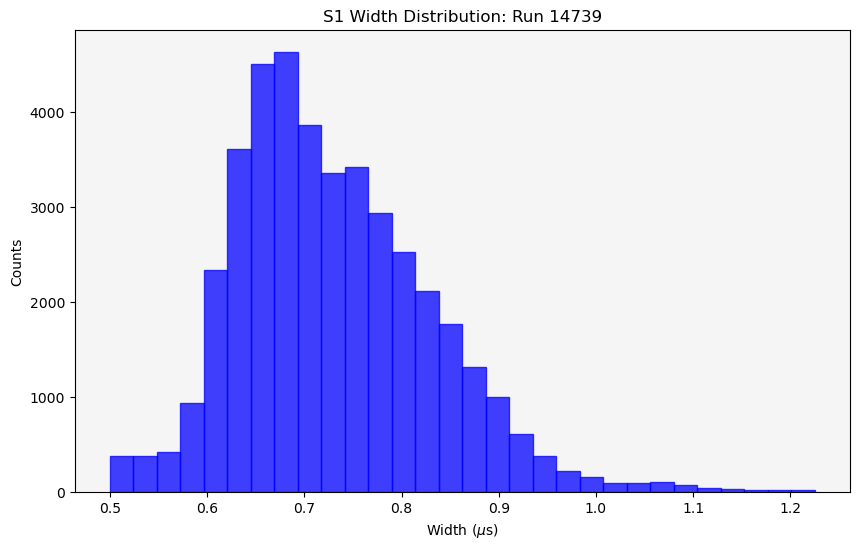

In [68]:
# Global
n_bins = 30

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    W1 = data[run_id]['S1w'] / 1e3  # [μs]
    
    # Masking
    W1_mask = W1[AV_mask[run_id]]
    
    # Histogram
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(W1_mask, bins=n_bins, density=False, 
                               color=pt.hist_colors[(i + 5) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 5) % len(pt.hist_colors)], lw=1.0)
    
    # Plot
    plt.xlabel('Width ($\mu$s)')
    plt.ylabel('Counts')
    # plt.yscale('log')
    plt.title(f'S1 Width Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    # plt.grid(True)
    # plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

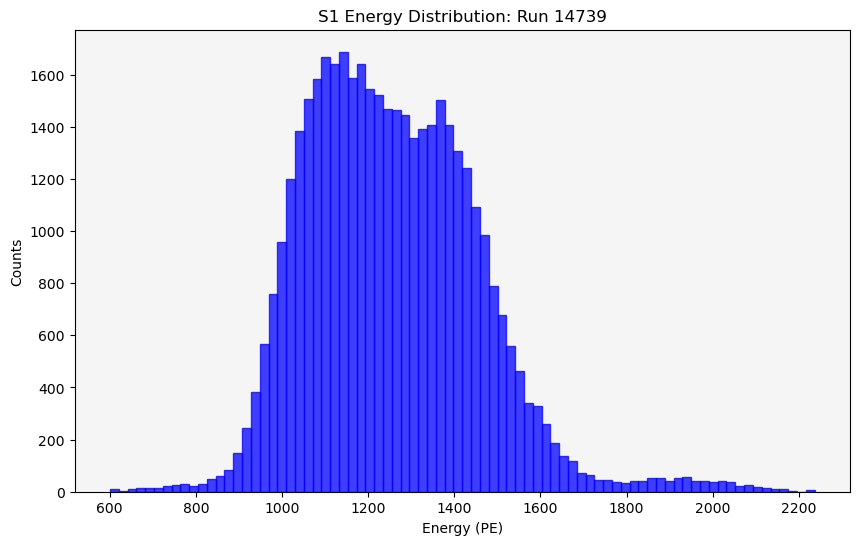

In [39]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    E1 = data[run_id]['S1e']
    
    # Masking
    E1_mask = E1[AV_mask[run_id]]
    
    # Histogram
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(E1_mask, bins=n_bins, density=False, 
                               color=pt.hist_colors[(i + 5) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 5) % len(pt.hist_colors)], lw=1.0)
    
    # Plot
    plt.xlabel('Energy (PE)')
    plt.ylabel('Counts')
    # plt.yscale('log')
    plt.title(f'S1 Energy Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    #plt.grid(True)
    #plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

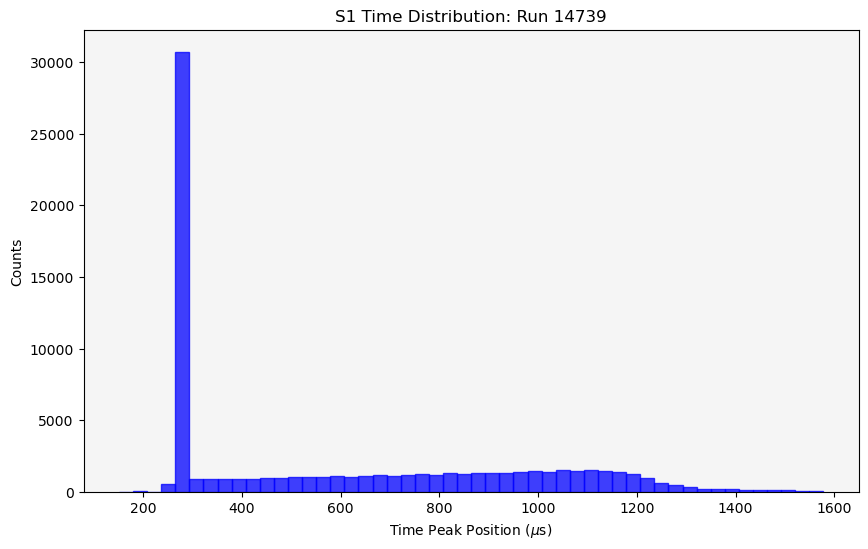

In [40]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    T1 = data[run_id]['S1t'] / 1e3  # [μs]
    
    # Masking
    T1_mask = T1[AV_mask[run_id]]
    
    # Histogram
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(T1, bins=n_bins, density=False, 
                               color=pt.hist_colors[(i + 5) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 5) % len(pt.hist_colors)], lw=1.0)
    
    # Plot
    plt.xlabel('Time Peak Position ($\mu$s)')
    plt.ylabel('Counts')
    #plt.yscale('log')
    plt.title(f'S1 Time Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    #plt.grid(True)
    #plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

### S2 distributions

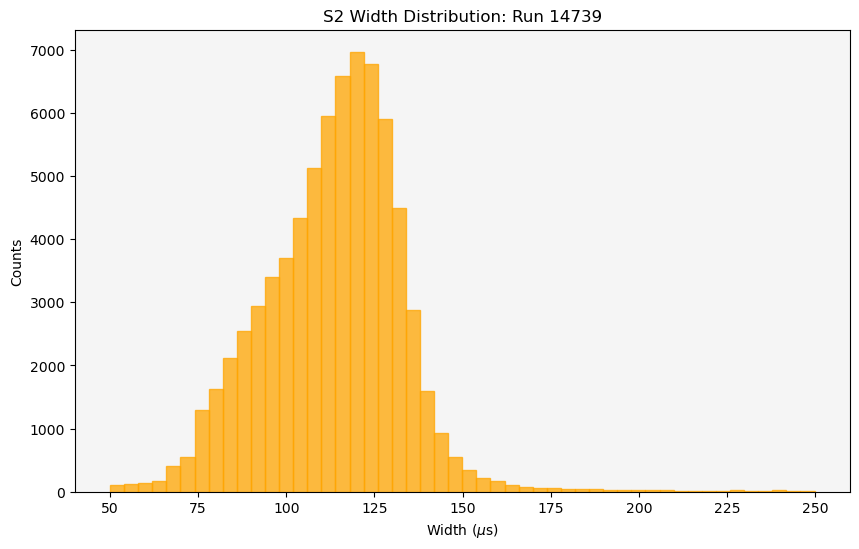

In [41]:
# Global
plt.figure(figsize=(10, 6))
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    W2 = data[run_id]['S2w']
    
    # Masking
    W2_mask = W2[AV_mask[run_id]]
    
    # Histogram
    counts, bins, _ = plt.hist(W2, bins=n_bins, density=False, 
                               color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=1.0)
    
    # Plot
    plt.xlabel('Width ($\mu$s)')
    plt.ylabel('Counts')
    #plt.yscale('log')
    plt.title(f'S2 Width Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    #plt.grid(True)
    #plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

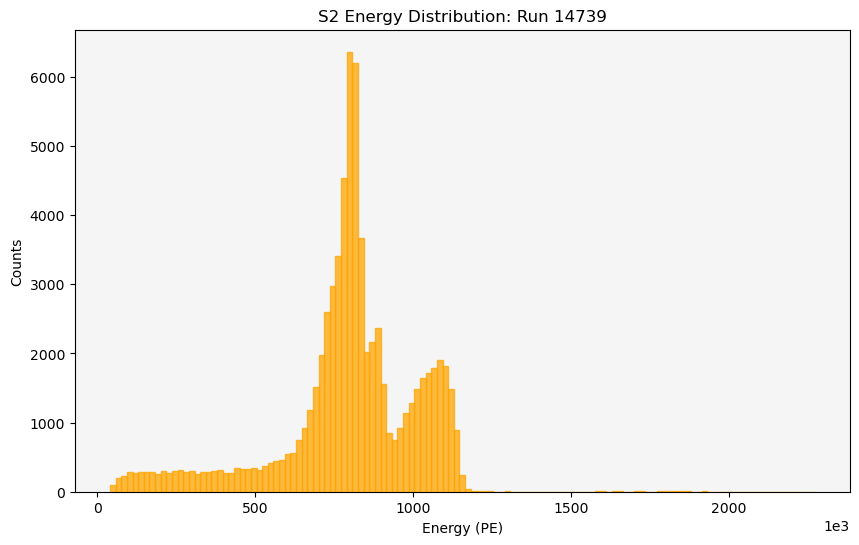

In [53]:
# Global
plt.figure(figsize=(10, 6))
n_bins = 125

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    E2 = data[run_id]['S2e']
    
    # Masking
    E2_mask = E2[AV_mask[run_id]]
    
    # Histogram
    counts, bins, _ = plt.hist(E2, bins=n_bins, density=False, 
                               color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=1.0)
    
    # Plot
    plt.xlabel('Energy (PE)')
    plt.ylabel('Counts')
    # plt.yscale('log')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
    plt.title(f'S2 Energy Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    #plt.grid(True)
    #plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

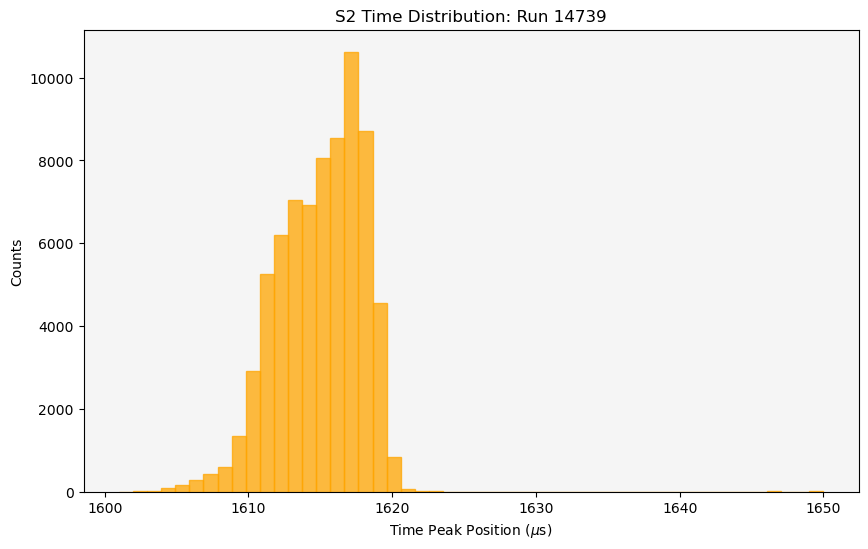

In [43]:
# Global
plt.figure(figsize=(10, 6))
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    T2 = data[run_id]['S2t'] / 1e3
    
    # Masking
    T2_mask = T2[AV_mask[run_id]]
    
    # Histogram
    counts, bins, _ = plt.hist(T2, bins=n_bins, density=False, 
                               color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                               ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=1.0)
    
    # Plot
    plt.xlabel('Time Peak Position ($\mu$s)')
    plt.ylabel('Counts')
    #plt.yscale('log')
    plt.title(f'S2 Time Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    #plt.grid(True)
    #plt.savefig(f'images/commissioning/something.png', bbox_inches='tight')
    plt.show()

## Commissioning Plots

### Event distribution

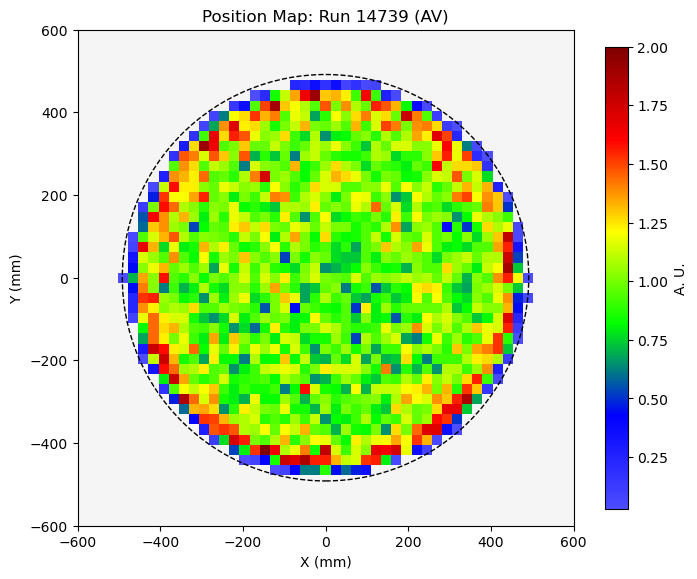

In [54]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    X = data[run_id]['X']
    Y = data[run_id]['Y']
    
    # Masking
    X_mask = X[AV_mask[run_id]]
    Y_mask = Y[AV_mask[run_id]]
    
    # Map
    xy_map, ex, ey = pt.mapping(X_mask, Y_mask, xy_bins=n_bins, pos=True, norm=True)
    xy_map         = np.ma.masked_where(xy_map==0, xy_map)                               # Zero values masked
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, xy_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title (f'Position Map: Run {run_id} (AV)') 
    
    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("whitesmoke")
    # plt.savefig(f'images/commissioning/XYmap_run{run_id}_AV.png', bbox_inches='tight')
    plt.show()

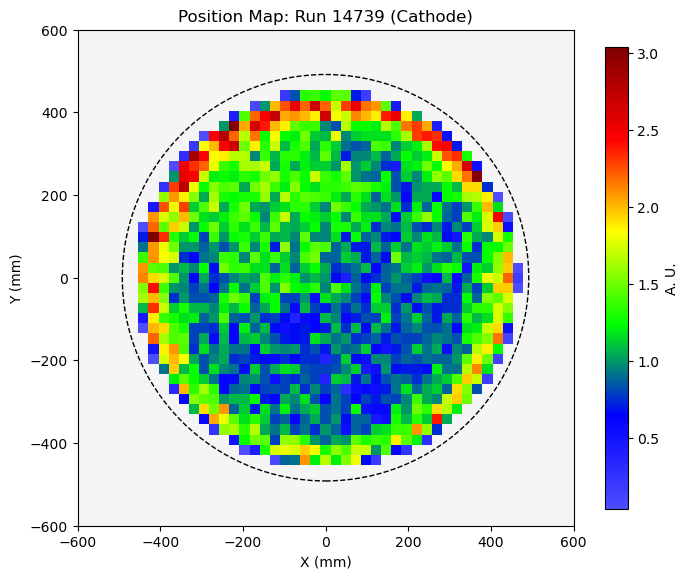

In [55]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    X = data[run_id]['X']
    Y = data[run_id]['Y']
    
    # Masking
    X_mask = X[cath_mask[run_id]]
    Y_mask = Y[cath_mask[run_id]]
    
    # Map
    xy_map, ex, ey = pt.mapping(X_mask, Y_mask, xy_bins=n_bins, pos=True, norm=True)
    xy_map         = np.ma.masked_where(xy_map==0, xy_map)                               # Zero values masked
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, xy_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title (f'Position Map: Run {run_id} (Cathode)') 
    
    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("whitesmoke")
    #plt.savefig(f'images/commissioning/XYmap_run{run_id}_cath.png', bbox_inches='tight')
    plt.show()

### Energy maps

#### $S1$e

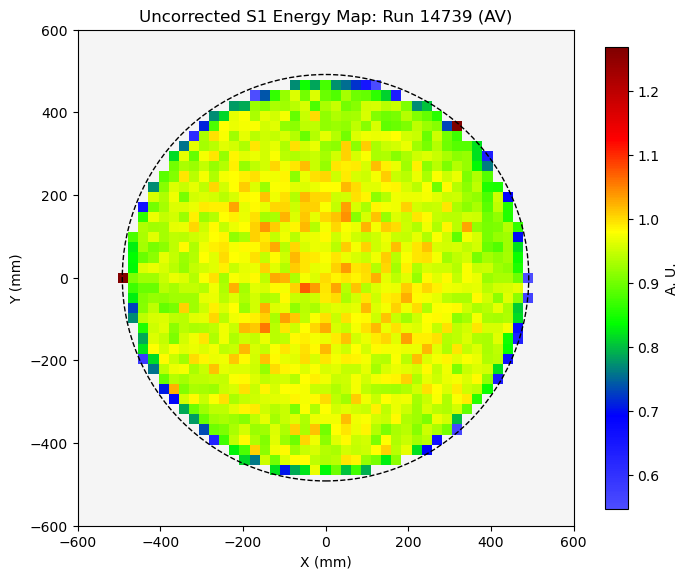

In [56]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    X  = data[run_id]['X']
    Y  = data[run_id]['Y']
    E1 = data[run_id]['S1e']
    
    # Masking
    X_mask  = X[AV_mask[run_id]]
    Y_mask  = Y[AV_mask[run_id]]
    E1_mask = E1[AV_mask[run_id]] 
    
    # Map
    S1e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E1_mask, xy_bins=n_bins, norm=True)
    S1e_map         = np.ma.masked_where(S1e_map==0, S1e_map)                               # Zero values masked
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, S1e_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title (f'Uncorrected S1 Energy Map: Run {run_id} (AV)') 
    
    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("whitesmoke")
    #plt.savefig(f'images/commissioning/E1map_run{run_id}_AV.png', bbox_inches='tight')
    plt.show()

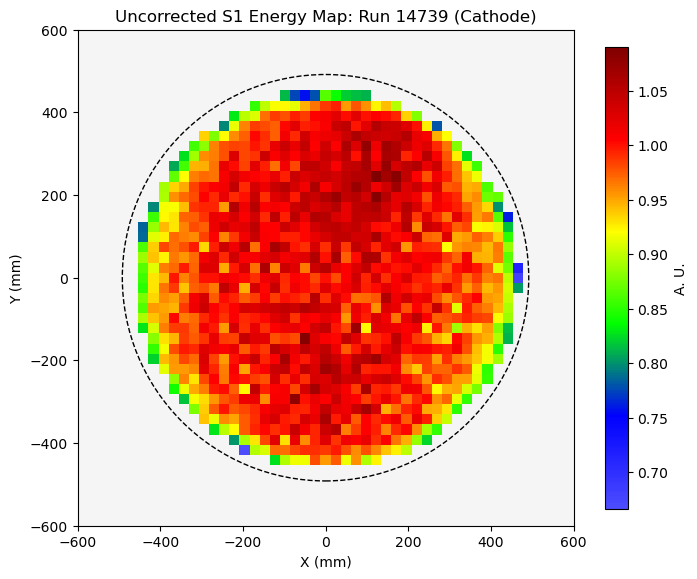

In [57]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    X  = data[run_id]['X']
    Y  = data[run_id]['Y']
    E1 = data[run_id]['S1e']
    
    # Masking
    X_mask  = X[cath_mask[run_id]]
    Y_mask  = Y[cath_mask[run_id]]
    E1_mask = E1[cath_mask[run_id]] 
    
    # Map
    S1e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E1_mask, xy_bins=n_bins, norm=True)
    S1e_map         = np.ma.masked_where(S1e_map==0, S1e_map)                               # Zero values masked
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, S1e_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title (f'Uncorrected S1 Energy Map: Run {run_id} (Cathode)') 
    
    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("whitesmoke")
    #plt.savefig(f'images/commissioning/E1map_run{run_id}_cath.png', bbox_inches='tight')
    plt.show()

#### $S2$e

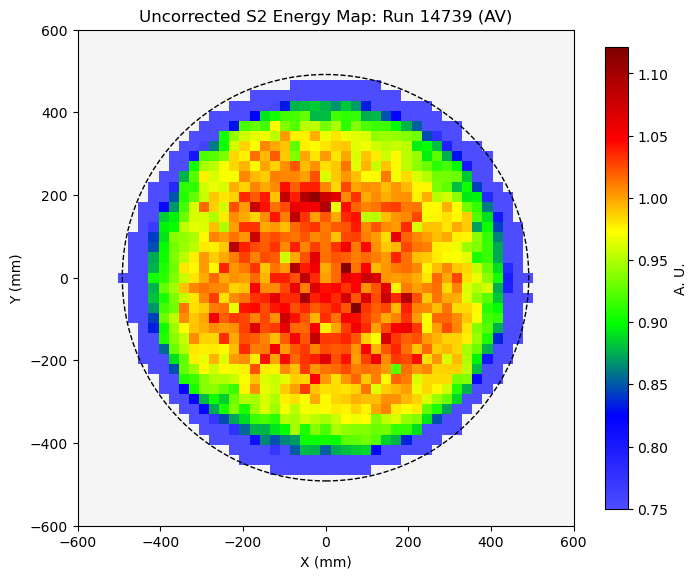

In [58]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    X  = data[run_id]['X']
    Y  = data[run_id]['Y']
    E2 = data[run_id]['S2e']
    
    # Masking
    X_mask  = X[AV_mask[run_id]]
    Y_mask  = Y[AV_mask[run_id]]
    E2_mask = E2[AV_mask[run_id]] 
    
    # Map
    S2e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E2_mask, xy_bins=n_bins, norm=True)
    S2e_map         = np.ma.masked_where(S2e_map==0, S2e_map)                               # Zero values masked
    S2e_map         = np.clip(S2e_map, 0.75, 1.25)                                            # Clipped values in colorbar
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, S2e_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title (f'Uncorrected S2 Energy Map: Run {run_id} (AV)') 
    
    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("whitesmoke")
    #plt.savefig(f'images/commissioning/E2map_run{run_id}_AV.png', bbox_inches='tight')
    plt.show()

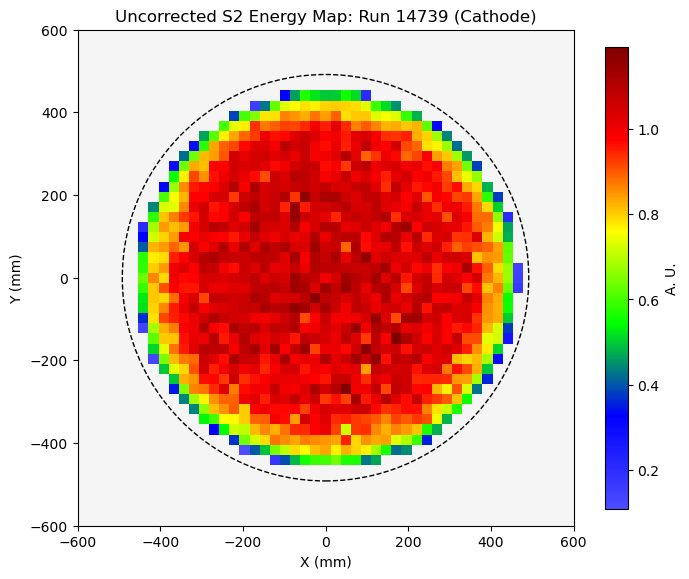

In [59]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    X  = data[run_id]['X']
    Y  = data[run_id]['Y']
    E2 = data[run_id]['S2e']
    
    # Masking
    X_mask  = X[cath_mask[run_id]]
    Y_mask  = Y[cath_mask[run_id]]
    E2_mask = E2[cath_mask[run_id]] 
    
    # Map
    S2e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E2_mask, xy_bins=n_bins, norm=True)
    S2e_map         = np.ma.masked_where(S2e_map==0, S2e_map)                               # Zero values masked
    #S2e_map         = np.clip(S2e_map, 0.75, 1.25)                                            # Clipped values in colorbar
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, S2e_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title (f'Uncorrected S2 Energy Map: Run {run_id} (Cathode)') 
    
    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("whitesmoke")
    #plt.savefig(f'images/commissioning/E2map_run{run_id}_cath.png', bbox_inches='tight')
    plt.show()

### Widths
Should we differentiate between active volume and cathode surface?

In [60]:
S1w_map, ex, ey = pt.mapping(X[AV_mask], Y[AV_mask], wei=W1[AV_mask], xy_bins=50, norm=False)
S1w_map         = np.ma.masked_where(S1w_map==0, S1w_map)  # Zero values masked

# Plot
plt.figure(figsize=(8, 8))
plt.pcolormesh(ex, ey, S1w_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='S1 width ($\mu$s)', shrink=0.75)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title(f'S1 Width Map: Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV] (AV)')

plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'images/maps/W1_run{run_info["run_number"]}_AV.png', bbox_inches='tight')
plt.show()

KeyError: "None of [Int64Index([14739], dtype='int64')] are in the [index]"

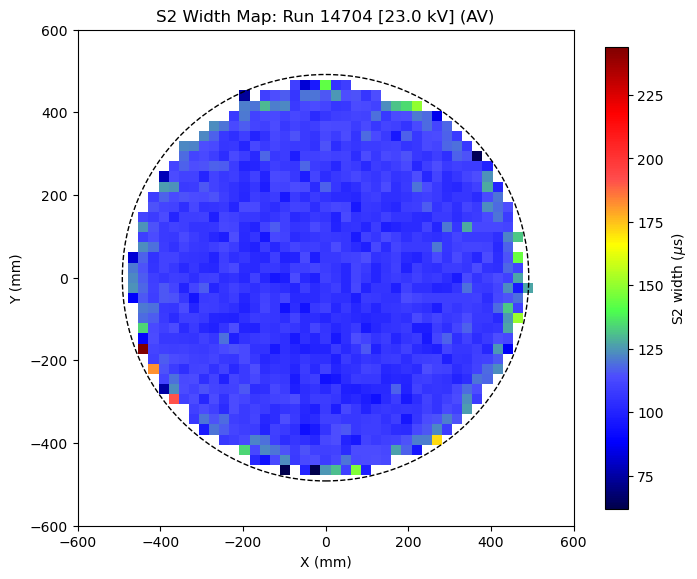

In [ ]:
S2w_map, ex, ey = pt.mapping(X[AV_mask], Y[AV_mask], wei=W2[AV_mask], xy_bins=50, norm=False)
S2w_map         = np.ma.masked_where(S2w_map==0, S2w_map)  # Zero values masked

# Plot
plt.figure(figsize=(8, 8))
plt.pcolormesh(ex, ey, S2w_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='S2 width ($\mu$s)', shrink=0.75)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title(f'S2 Width Map: Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV] (AV)')

plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'images/maps/W2_run{run_info["run_number"]}_AV.png', bbox_inches='tight')
plt.show()

### Radial dependence

In [ ]:
# Radial limits
R_lim  = [400, 300, 200]
R2_lim = [r**2 for r in R_lim]
# Radial mask
radE1_mask = R <= 400
radE2_mask = R <= 200

#### $S1$e vs $S2$e

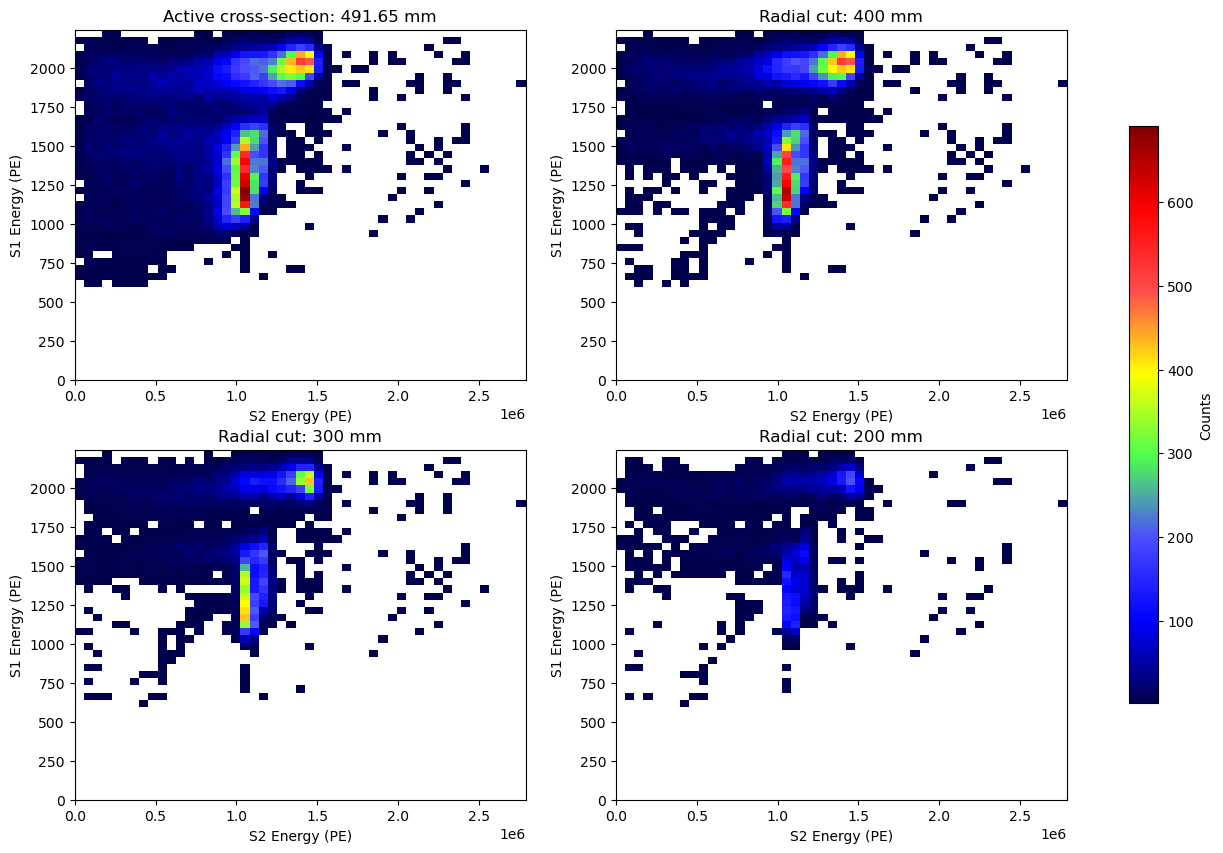

In [ ]:
# Let's create a matrix of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes      = axes.flatten()                        #flatten axes for easier looping

# Bins for S1e and S2e
E1_bins = np.linspace(0, E1.max(), 50)
E2_bins = np.linspace(0, E2.max(), 50)

# 2D histogram counting entries per bin (without weights)
S1e_S2e_map, ex, ey = np.histogram2d(E2, E1, bins=[E2_bins, E1_bins])
# Zero values masked
S1e_S2e_map = np.ma.masked_where(S1e_S2e_map==0, S1e_S2e_map)
#S1e_S2e_map = np.clip(S1e_S2e_map, 0, 1000)                  #clipped values in colorbar

# Global z-value for all subplots
z_min, z_max = S1e_S2e_map.min(), S1e_S2e_map.max()

# Plotting global dataset
pcm = axes[0].pcolormesh(ex, ey, S1e_S2e_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
axes[0]      .set_xlabel('S2 Energy (PE)')
axes[0]      .set_ylabel('S1 Energy (PE)')
axes[0]      .set_title (f'Active cross-section: {pt.N100_rad} mm')

# Subplots with radial cuts
for i, R_cut in enumerate(R_lim):
    
    mask      = (R <= R_cut)       #radial condition
    E1_masked = E1[mask]
    E2_masked = E2[mask]
    
    # 2D histogram
    S1e_S2e_map, ex, ey = np.histogram2d(E2_masked, E1_masked, bins=[E2_bins, E1_bins])
    # Zero values masked
    S1e_S2e_map = np.ma.masked_where(S1e_S2e_map==0, S1e_S2e_map)
    
    # Plotting
    pcm = axes[i + 1].pcolormesh(ex, ey, S1e_S2e_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
    axes[i + 1]      .set_xlabel('S2 Energy (PE)')
    axes[i + 1]      .set_ylabel('S1 Energy (PE)')
    axes[i + 1]      .set_title (f'Radial cut: {R_cut} mm')

# Add a single colorbar for the entire canvas
cbar = fig.colorbar(pcm, ax=axes, label='Counts', orientation='vertical', shrink=0.75)

plt.show()   

#### $S1$e vs DT 

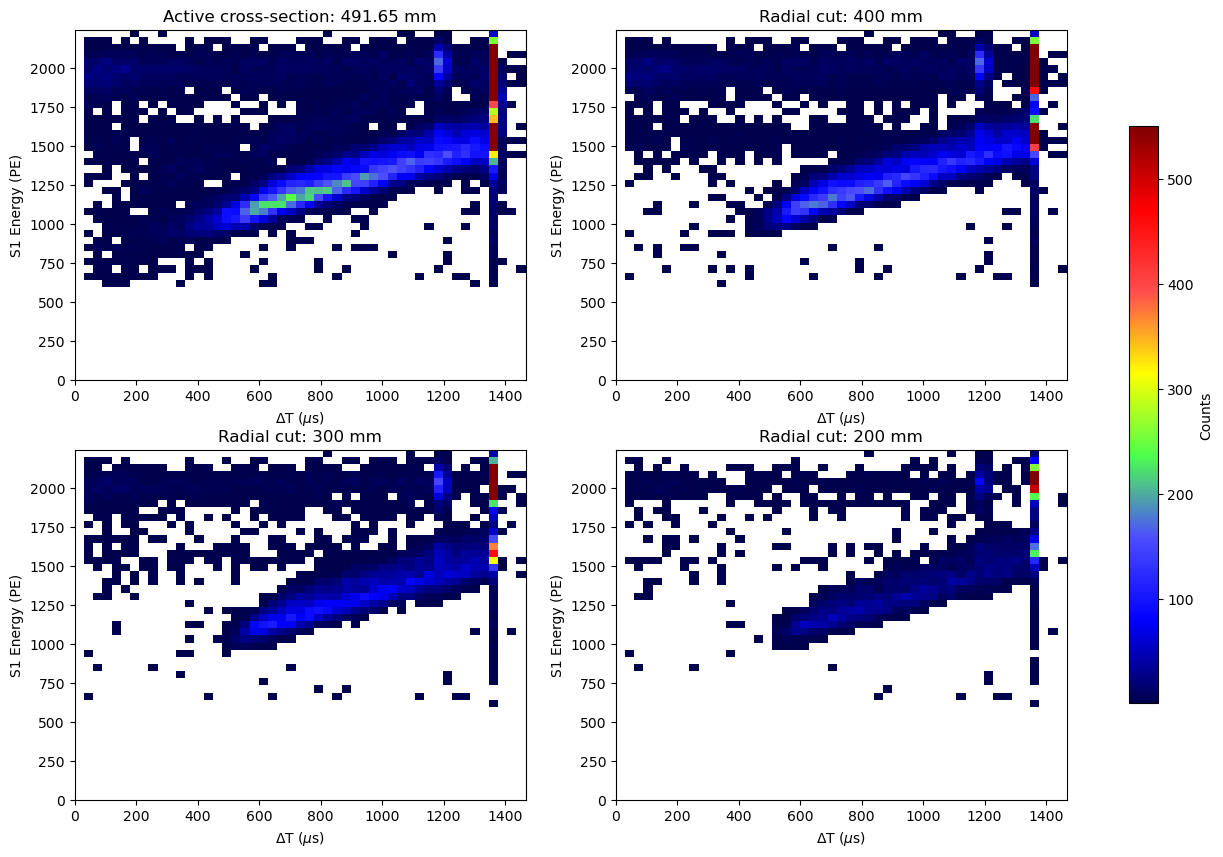

In [ ]:
# Let's create a matrix of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes      = axes.flatten()                        #flatten axes for easier looping

# Bins for S1e and DT
E1_bins = np.linspace(0, E1.max(), 50)
DT_bins = np.linspace(0, DT.max(), 50)

# 2D histogram counting entries per bin (without weights)
S1e_DT_map, ex, ey = np.histogram2d(DT, E1, bins=[DT_bins, E1_bins])
# Zero values masked
S1e_DT_map = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)
S1e_DT_map = np.clip(S1e_DT_map, 0, 550)                  #clipped values in colorbar

# Global z-value for all subplots
z_min, z_max = S1e_DT_map.min(), S1e_DT_map.max()

# Plotting global dataset
pcm = axes[0].pcolormesh(ex, ey, S1e_DT_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
axes[0]      .set_xlabel('$\Delta$T ($\mu$s)')
axes[0]      .set_ylabel('S1 Energy (PE)')
axes[0]      .set_title (f'Active cross-section: {pt.N100_rad} mm')

# Subplots with radial cuts
for i, R_cut in enumerate(R_lim):
    
    mask      = (R <= R_cut)       #radial condition
    E1_masked = E1[mask]
    DT_masked = DT[mask]
    
    # 2D histogram
    S1e_DT_map, ex, ey = np.histogram2d(DT_masked, E1_masked, bins=[DT_bins, E1_bins])
    # Zero values masked
    S1e_DT_map = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)
    
    # Plotting
    pcm = axes[i + 1].pcolormesh(ex, ey, S1e_DT_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
    axes[i + 1]      .set_xlabel('$\Delta$T ($\mu$s)')
    axes[i + 1]      .set_ylabel('S1 Energy (PE)')
    axes[i + 1]      .set_title (f'Radial cut: {R_cut} mm')

# Add a single colorbar for the entire canvas
cbar = fig.colorbar(pcm, ax=axes, label='Counts', orientation='vertical', shrink=0.75)

plt.show()  

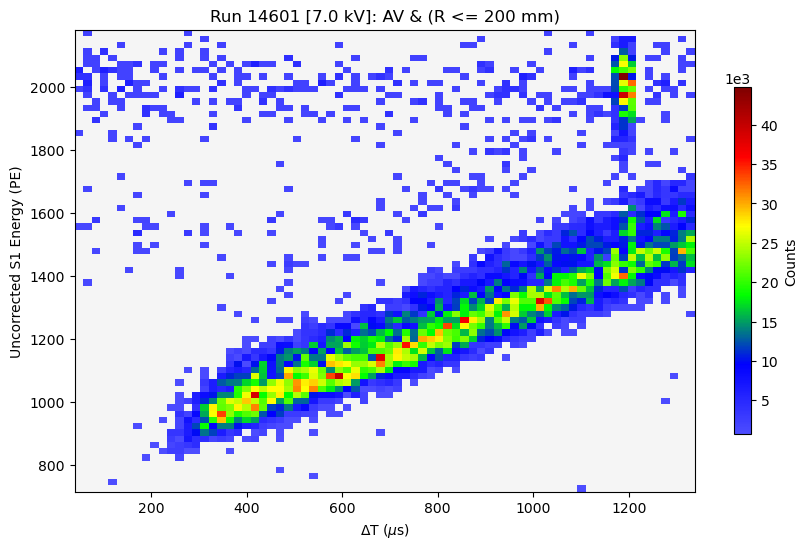

In [ ]:
# Global
rad_lim = 200
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    E1 = data[run_id]['S1e']
    DT = data[run_id]['DT']
    R  = data[run_id]['R']
    
    # Masking
    rad_mask = (R <= rad_lim)
    E1_mask = E1[AV_mask[run_id] & rad_mask] 
    DT_mask = DT[AV_mask[run_id] & rad_mask] 
    
    # Map
    S1e_DT_map, ex, ey = pt.hist_2D(DT_mask, E1_mask, wei=E1_mask, x_bins=75, y_bins=75)
    S1e_DT_map         = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)                               # Zero values masked
    #S1e_DT_map         = np.clip(S1e_DT_map, 0, 40e3)                                              # Clipped values in colorbar
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(ex, ey, S1e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
    cbar = plt.colorbar(label='Counts', shrink=0.75)
    cbar.formatter.set_powerlimits((3, 3))
    plt.xlabel('$\Delta$T ($\mu$s)')
    plt.ylabel('Uncorrected S1 Energy (PE)')
    plt.title(f'Run {run_id} [{run_volt} kV]: AV & (R <= {rad_lim} mm)')

    plt.gca().set_facecolor("whitesmoke")
    plt.savefig(f'images/commissioning/S1e_DT_run{run_id}_AV_rad.png', bbox_inches='tight')
    plt.show()

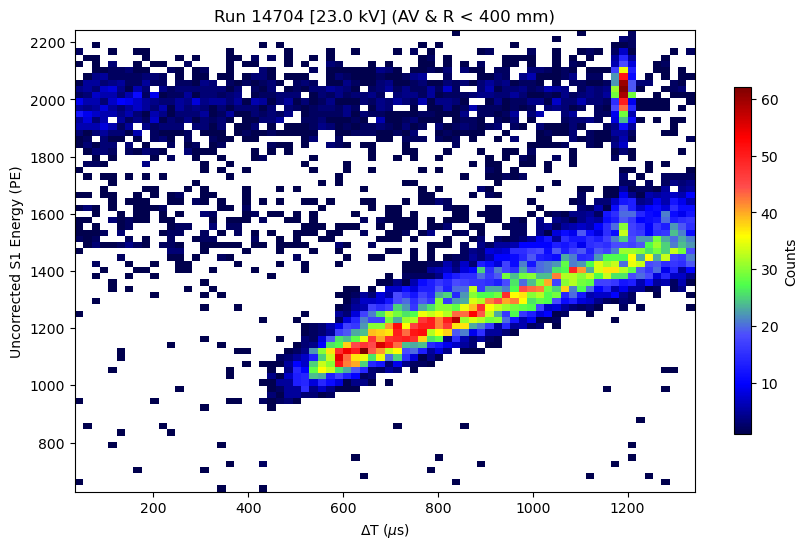

In [ ]:
# 2D histogram
E1_masked = E1[AV_mask & radE1_mask]
DT_masked = DT[AV_mask & radE1_mask]
S1e_DT_map, ex, ey = pt.hist_2D(DT_masked, E1_masked, x_bins=75, y_bins=75)
S1e_DT_map = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)  # Zero values masked
#S1e_DT_map = np.clip(S1e_DT_map, 0, 50)                   # Clipped values in colorbar
        
# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(ex, ey, S1e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='Counts', shrink=0.75)
plt.xlabel('$\Delta$T ($\mu$s)')
plt.ylabel('Uncorrected S1 Energy (PE)')
plt.title(f'Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV] (AV & R < 400 mm)')

plt.savefig(f'images/maps/S1e_DT_run{run_info["run_number"]}_AV_Rad.png', bbox_inches='tight')
plt.show() 

#### $S2$e vs DT: Lifetime

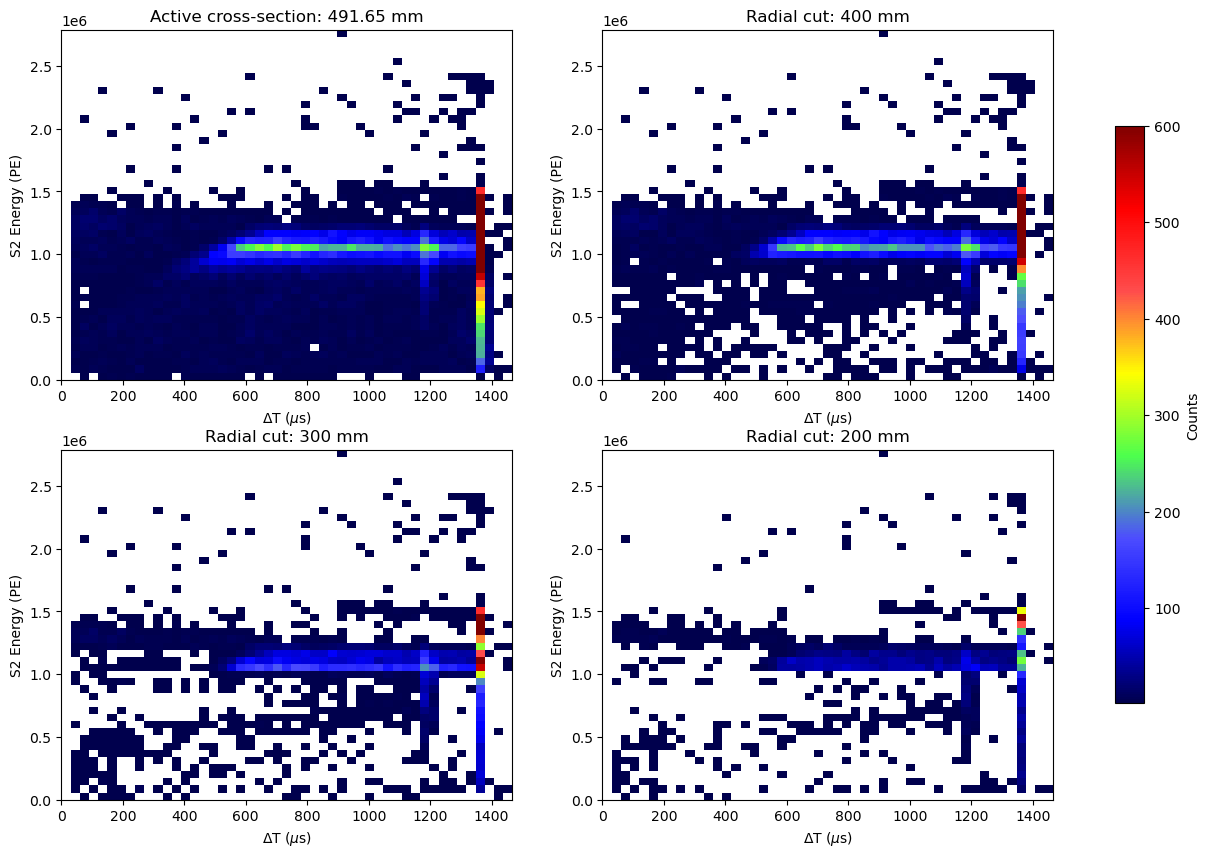

In [ ]:
# Let's create a matrix of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes      = axes.flatten()                        #flatten axes for easier looping

# Bins for S2e and DT
E2_bins = np.linspace(0, E2.max(), 50)
DT_bins = np.linspace(0, DT.max(), 50)

# 2D histogram counting entries per bin (without weights)
S2e_DT_map, ex, ey = np.histogram2d(DT, E2, bins=[DT_bins, E2_bins])
# Zero values masked
S2e_DT_map = np.ma.masked_where(S2e_DT_map==0, S2e_DT_map)
S2e_DT_map = np.clip(S2e_DT_map, 0, 600)                  #clipped values in colorbar

# Global z-value for all subplots
z_min, z_max = S2e_DT_map.min(), S2e_DT_map.max()

# Plotting global dataset
pcm = axes[0].pcolormesh(ex, ey, S2e_DT_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
axes[0]      .set_xlabel('$\Delta$T ($\mu$s)')
axes[0]      .set_ylabel('S2 Energy (PE)')
axes[0]      .set_title (f'Active cross-section: {pt.N100_rad} mm')

# Subplots with radial cuts
for i, R_cut in enumerate(R_lim):
    
    mask      = (R <= R_cut)       #radial condition
    E2_masked = E2[mask]
    DT_masked = DT[mask]
    
    # 2D histogram
    S2e_DT_map, ex, ey = np.histogram2d(DT_masked, E2_masked, bins=[DT_bins, E2_bins])
    # Zero values masked
    S2e_DT_map = np.ma.masked_where(S2e_DT_map==0, S2e_DT_map)
    
    # Plotting
    pcm = axes[i + 1].pcolormesh(ex, ey, S2e_DT_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
    axes[i + 1]      .set_xlabel('$\Delta$T ($\mu$s)')
    axes[i + 1]      .set_ylabel('S2 Energy (PE)')
    axes[i + 1]      .set_title (f'Radial cut: {R_cut} mm')

# Add a single colorbar for the entire canvas
cbar = fig.colorbar(pcm, ax=axes, label='Counts', orientation='vertical', shrink=0.75)

plt.show() 

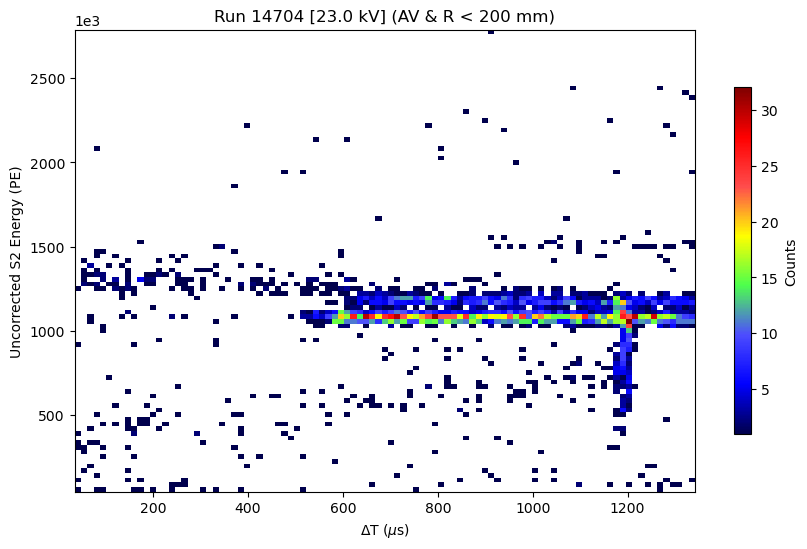

In [ ]:
# To present
E2_masked = E2[AV_mask & radE2_mask]
DT_masked = DT[AV_mask & radE2_mask]

# 2D histogram counting entries per bin (without weights)
S2e_DT_map, ex, ey = pt.hist_2D(DT_masked, E2_masked, x_bins=100, y_bins=100)
# Zero values masked
S2e_DT_map = np.ma.masked_where(S2e_DT_map==0, S2e_DT_map)
#S2e_DT_map = np.clip(S2e_DT_map, 0, 600)                  #clipped values in colorbar

# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(ex, ey, S2e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='Counts', shrink=0.75)
plt.xlabel('$\Delta$T ($\mu$s)')
plt.ylabel('Uncorrected S2 Energy (PE)')
#plt.ylim(200e3, 1000e3)
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.title(f'Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV] (AV & R < 200 mm)')

plt.savefig(f'images/maps/S2e_DT_run{run_info["run_number"]}_AV_Rad.png', bbox_inches='tight')
plt.show() 

#### $S2$e vs R

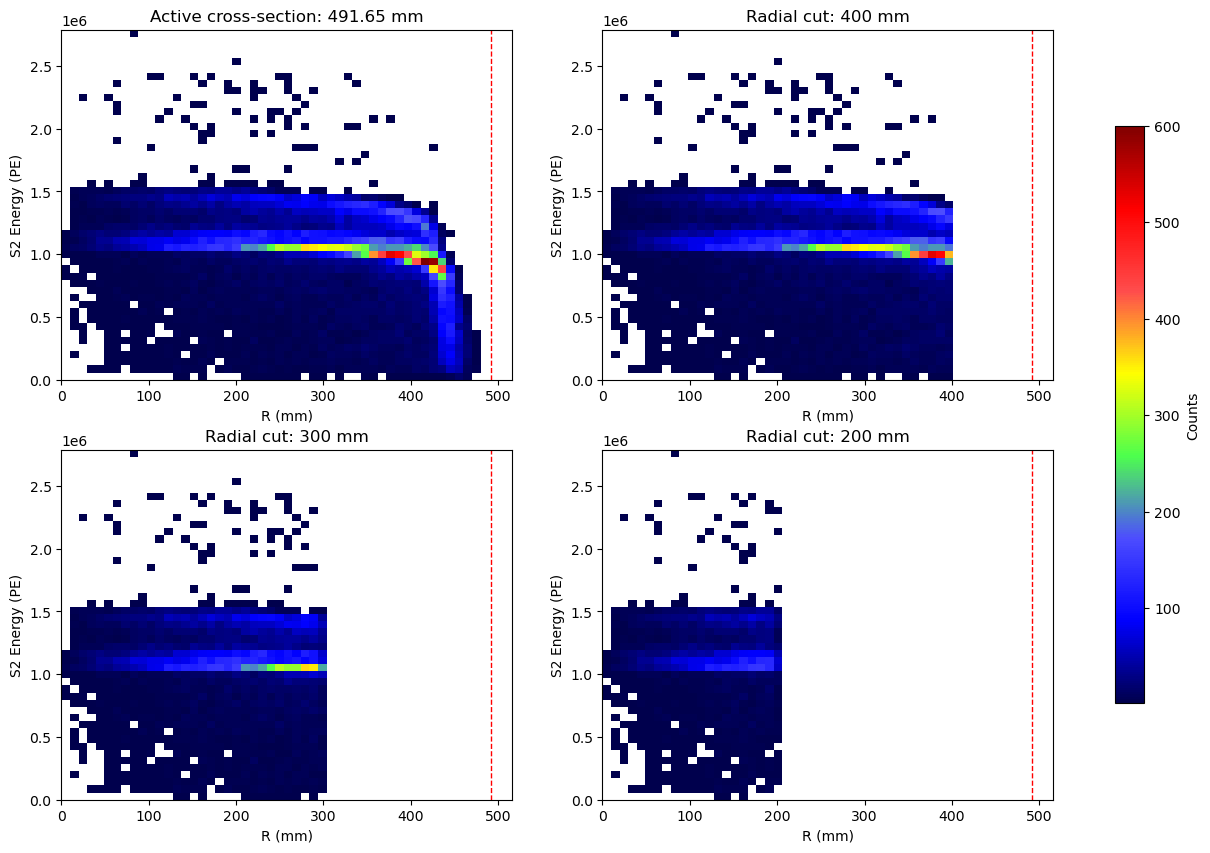

In [ ]:
# Let's create a matrix of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes      = axes.flatten()                        #flatten axes for easier looping

# Bins for S2e and R
E2_bins = np.linspace(0, E2.max(), 50)
R_bins  = np.linspace(0, R.max(), 50)

# 2D histogram counting entries per bin (without weights)
S2e_R_map, ex, ey = np.histogram2d(R, E2, bins=[R_bins, E2_bins])
# Zero values masked
S2e_R_map = np.ma.masked_where(S2e_R_map==0, S2e_R_map)
S2e_R_map = np.clip(S2e_R_map, 0, 600)                  #clipped values in colorbar

# Global z-value for all subplots
z_min, z_max = S2e_R_map.min(), S2e_R_map.max()

# Plotting global dataset
pcm = axes[0].pcolormesh(ex, ey, S2e_R_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
axes[0]      .set_xlabel('R (mm)')
axes[0]      .set_ylabel('S2 Energy (PE)')
axes[0]      .set_title (f'Active cross-section: {pt.N100_rad} mm')
# Radial limit
axes[0]      .axvline   (x=pt.N100_rad, color='red', linestyle='--', linewidth=1)

# Subplots with radial cuts
for i, R_cut in enumerate(R_lim):
    
    mask      = (R <= R_cut)       #radial condition
    E2_masked = E2[mask]
    R_masked = R[mask]
    
    # 2D histogram
    S2e_R_map, ex, ey = np.histogram2d(R_masked, E2_masked, bins=[R_bins, E2_bins])
    # Zero values masked
    S2e_R_map = np.ma.masked_where(S2e_R_map==0, S2e_R_map)
    
    # Plotting
    pcm = axes[i + 1].pcolormesh(ex, ey, S2e_R_map.T, vmin=z_min, vmax=z_max, cmap=pt.custom_hsv, shading='auto')
    axes[i + 1]      .set_xlabel('R (mm)')
    axes[i + 1]      .set_ylabel('S2 Energy (PE)')
    axes[i + 1]      .set_title (f'Radial cut: {R_cut} mm')
    # Radial limit
    axes[i + 1]      .axvline   (x=pt.N100_rad, color='red', linestyle='--', linewidth=1)

# Add a single colorbar for the entire canvas
cbar = fig.colorbar(pcm, ax=axes, label='Counts', orientation='vertical', shrink=0.75)

plt.show() 

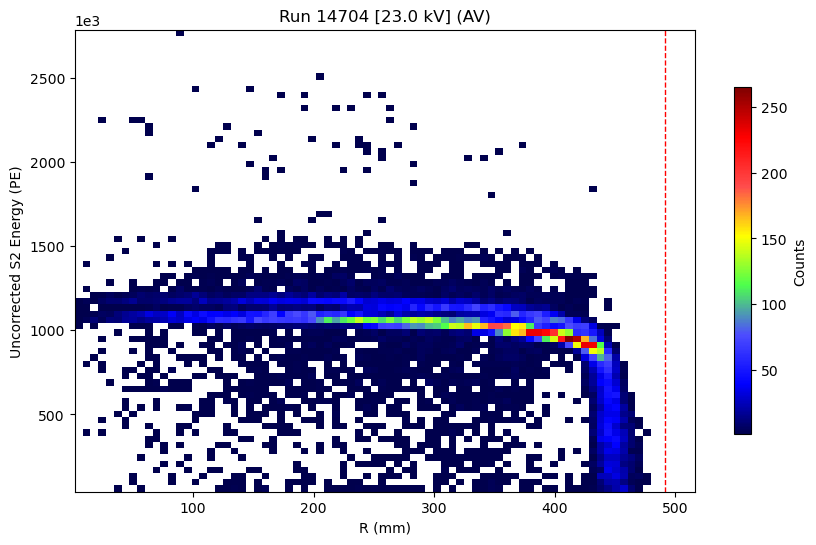

In [ ]:
# To present
E2_masked = E2[AV_mask]
R_masked  = R[AV_mask]

# 2D histogram counting entries per bin (without weights)
S2e_R_map, ex, ey = pt.hist_2D(R_masked, E2_masked,  x_bins=75, y_bins=75)
# Zero values masked
S2e_R_map = np.ma.masked_where(S2e_R_map==0, S2e_R_map)
#S2e_R_map = np.clip(S2e_R_map, 0, 600)                  #clipped values in colorbar

# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(ex, ey, S2e_R_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='Counts', shrink=0.75)
plt.xlabel('R (mm)')
plt.ylabel('Uncorrected S2 Energy (PE)')
#plt.ylim(0, 1000e3)
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.title(f'Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV] (AV)')
# Radial limit
plt.axvline(x=pt.N100_rad, c='red', ls='--', lw=1)

plt.savefig(f'images/maps/S2e_R_run{run_info["run_number"]}_AV_Rad.png', bbox_inches='tight')
plt.show()    

## Fits
To fit data we just use the population of the detector's center, where the information is quite uniform.

In [ ]:
# Store the fits information
fit_parameters = {run["run_number"]: {} for run in runs_info}

#### $S1$e vs DT 

In [ ]:
# 2D histogram
E1_masked = E1[AV_mask & radE1_mask]
DT_masked = DT[AV_mask & radE1_mask]
S1e_DT_map, ex, ey = pt.hist_2D(DT_masked, E1_masked, x_bins=75, y_bins=75)
S1e_DT_map = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)  # Zero values masked
#S1e_DT_map = np.clip(S1e_DT_map, 0, 50)                   # Clipped values in colorbar

# Preliminar fitting
E1_down = 0
E1_up   = 1700
DT_centers, median_S1e = ff.prefit_median(ex, DT_masked, E1_masked, y_min=E1_down, y_max=E1_up)

# Linear fitting
popt, pcov = curve_fit(ff.linear_func, DT_centers, median_S1e)
fit_x = np.linspace(DT_centers.min(), DT_centers.max(), 100)
fit_y = ff.linear_func(fit_x, *popt)
fit_parameters[run_info["run_number"]]["S1e"] = {"CV": popt, "Err": pcov}
print(f'Run {run_info["run_number"]} Fit: slope = {popt[0]} PE/μs, intercept = {popt[1]} PE')
        
# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(ex, ey, S1e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='Counts', shrink=0.75)
plt.xlabel('$\Delta$T ($\mu$s)')
plt.ylabel('Uncorrected S1 Energy (PE)')
plt.title(f'Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV]: Active volume & R < 400 mm')
# Fit
plt.plot(fit_x, fit_y, c='black', ls='--', lw=1)
plt.axhline(y=E1_up, c='red', ls='--', lw=0.75)

#plt.savefig(f'images/fits/S1e_DT_run{run_info["run_number"]}.png', bbox_inches='tight')
plt.show() 

NameError: name 'radE1_mask' is not defined

#### $S2$e vs DT: Lifetime

Run 14739 fit: N0 = 840293.57 PE, τ = 54.00 ms


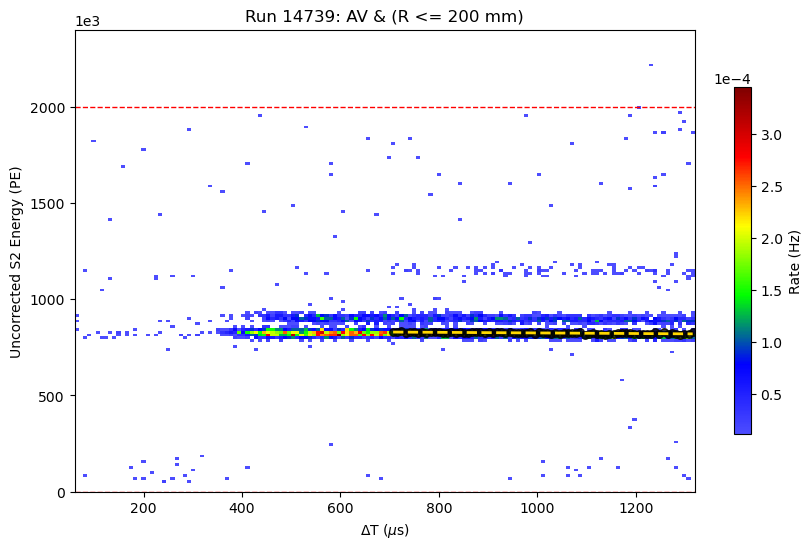

In [ ]:
# Global
rad_lim = 200
n_bins  = 150
E2_down = 0
E2_up   = 2000e3

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E2 = data[run_id]['S2e']
    DT = data[run_id]['DT']
    R  = data[run_id]['R']
    
    # Masking
    rad_mask = (R <= rad_lim)
    E2_mask  = E2[AV_mask[run_id] & rad_mask]
    DT_mask  = DT[AV_mask[run_id] & rad_mask]

    # 2D histogram
    S2e_DT_map, ex, ey = pt.hist_2D(DT_mask, E2_mask, x_bins=n_bins, y_bins=n_bins)
    S2e_DT_map         = S2e_DT_map / run_long                                                       # Normalized by rate
    S2e_DT_map         = np.ma.masked_where(S2e_DT_map==0, S2e_DT_map)                               # Zero values masked
    #S2e_DT_map = np.clip(S2e_DT_map, 0, 50)                                                         # Clipped values in colorbar

    # Preliminar fitting
    DT_centers, median_S2e = ff.prefit_2D(ex, DT_mask, E2_mask, x_min=700, x_max=DT_mask.max(), y_min=E2_down, y_max=E2_up)
    # Exponential fit
    initial_N0  = median_S2e.max()                     if len(median_S2e) > 0 else 1e5
    initial_tau = (DT_centers[-1] - DT_centers[0]) / 2 if len(DT_centers) > 1 else 1e5
    p0 = (initial_N0, initial_tau)
    popt, pcov = curve_fit(ff.exponential_decay, DT_centers, median_S2e, p0=p0)
    # Results
    print(f'Run {run_id} fit: N0 = {popt[0]:.2f} PE, τ = {popt[1] / 1e3:.2f} ms')
    perr = np.sqrt(np.diag(pcov))
    fit_parameters[run_id]["S2e"] = {"CV_N0": popt[0], "Error_N0": perr[0], "CV_tau": popt[1], "Error_tau": perr[1]}
    
    fit_x = np.linspace(DT_centers.min(), DT_centers.max(), n_bins)
    fit_y = ff.exponential_decay(fit_x, *popt)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(ex, ey, S2e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.xlabel('$\Delta$T ($\mu$s)')
    plt.ylabel('Uncorrected S2 Energy (PE)')
    plt.ylim(0.8*E2_down, 1.2*E2_up)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))    
    cbar = plt.colorbar(label='Rate (Hz)', shrink=0.75)
    cbar.formatter.set_powerlimits((0, 0))
    plt.title(f'Run {run_id}: AV & (R <= {rad_lim} mm)')
    # Fit
    plt.scatter(DT_centers, median_S2e, c='black', alpha=0.8, s=30)
    plt.plot(fit_x, fit_y, c='gold', ls='--', lw=2)
    plt.axhline(y=E2_up, c='red', ls='--', lw=1.0)
    plt.axhline(y=E2_down, c='red', ls='--', lw=1.0)

    #plt.savefig(f'images/something.png', bbox_inches='tight')
    plt.show() 

## Corrections

### $S1$e

In [ ]:
# Inputs of correction
DT_cath = DT_stop[run_info["run_number"]]
CV_fit  = fit_parameters[run_info['run_number']]['S1e']['CV']

data_v1['S1e_corr'] = crudo.correct_S1e(E1, DT, DT_cath, CV_fit)

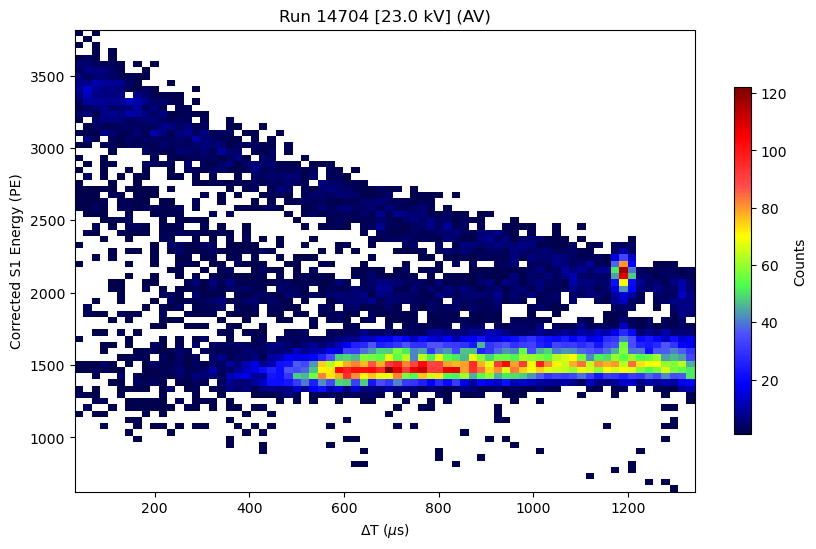

In [ ]:
# Let's chek if the "light collection" is corrected: just use the AV
E1_corr = data_v1['S1e_corr']

E1c_masked = E1_corr[AV_mask]
DT_masked  = DT[AV_mask]
S1e_DT_map, ex, ey = pt.hist_2D(DT_masked, E1c_masked, x_bins=75, y_bins=75)
S1e_DT_map = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)  # Zero values masked
#S1e_DT_map = np.clip(S1e_DT_map, 0, 50)                   # Clipped values in colorbar

        
# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(ex, ey, S1e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
plt.colorbar(label='Counts', shrink=0.75)
plt.xlabel('$\Delta$T ($\mu$s)')
plt.ylabel('Corrected S1 Energy (PE)')
plt.title(f'Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV] (AV)')

#plt.savefig(f'images/fits/S1e_DT_run{run_info["run_number"]}.png', bbox_inches='tight')
plt.show()  

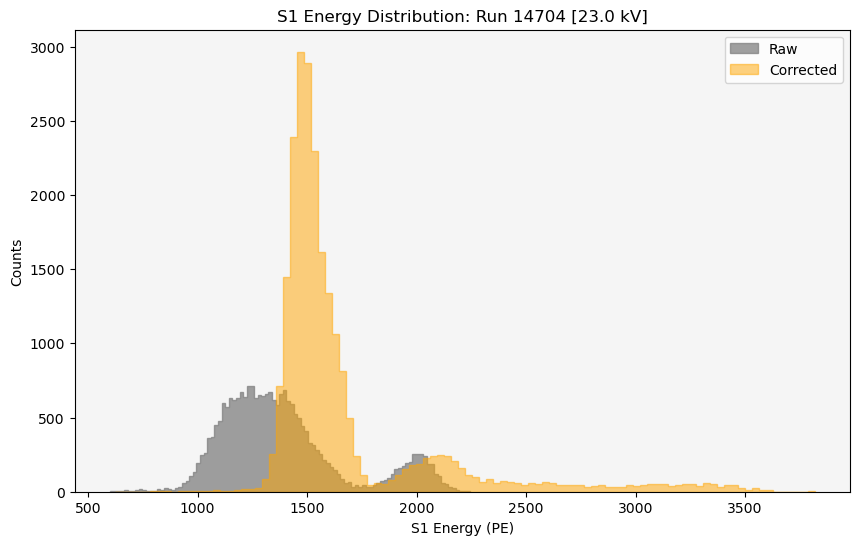

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(E1[AV_mask], bins=100, histtype='stepfilled', color='grey', alpha=0.75, ec='grey', label='Raw')
plt.hist(E1c_masked, bins=100,  histtype='stepfilled', color='orange', alpha=0.50, ec='orange', label='Corrected')
plt.xlabel('S1 Energy (PE)')
plt.ylabel('Counts')
plt.title(f'S1 Energy Distribution: Run {run_info["run_number"]} [{run_info["voltage"] / 1e3} kV]')
plt.legend()

plt.gca().set_facecolor('whitesmoke')
#plt.grid(True)
plt.show()

### $S2$e

In [ ]:
print(AV_mask[14704])

1          True
11        False
19        False
22         True
35         True
          ...  
258227     True
258230    False
258243    False
258244    False
258252    False
Name: DT, Length: 35091, dtype: bool


In [ ]:
print(fit_parameters)

{14704: {'S2e': {'CV_N0': 1098967.825193801, 'Error_N0': 5018.475154713275, 'CV_tau': 112271.59726790997, 'Error_tau': 55832.06919514373}}}


In [ ]:
# Global
n_bins = 50
for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    
    # Inputs of correction by lifetime
    CV_fit = [fit_parameters[run_id]['S2e']['CV_N0'], fit_parameters[run_id]['S2e']['CV_tau']]
    # Corrections to all S2e data
    data[run_id] = crudo.correct_S2e_LT(data[run_id], CV_fit, output_column='S2e_corr_LT')             # Lifetime
    data[run_id] = crudo.correct_S2e_map(data[run_id], AV_mask[run_id], xy_bins=n_bins, input_column='S2e_corr_LT')     # Energy map
    
data[14704][['DT', 'R', 'S2e', 'S2e_corr_LT', 'S2e_corr']]

,DT,R,S2e,S2e_corr_LT,S2e_corr
1,874.584778,376.928869,1.001820e+06,1.009655e+06,1.070068e+06
11,1368.186523,416.295101,1.244599e+06,1.259859e+06,1.430522e+06
19,1373.713867,434.846405,2.161311e+05,2.187919e+05,2.956278e+05
22,1098.951538,441.811101,2.063790e+05,2.084090e+05,3.812798e+05
35,498.036407,420.021631,9.333938e+05,9.375435e+05,1.101566e+06
...,...,...,...,...,...
258227,805.271912,275.326478,1.163168e+06,1.171541e+06,1.221051e+06
258230,1372.710449,427.148661,1.209412e+06,1.224290e+06,1.375847e+06
258243,1369.935425,237.861389,1.395374e+06,1.412504e+06,1.425730e+06
258244,1375.108398,435.795626,4.585360e+05,4.641867e+05,7.197770e+05


Aquí comprobamos la S2e_corr_LT

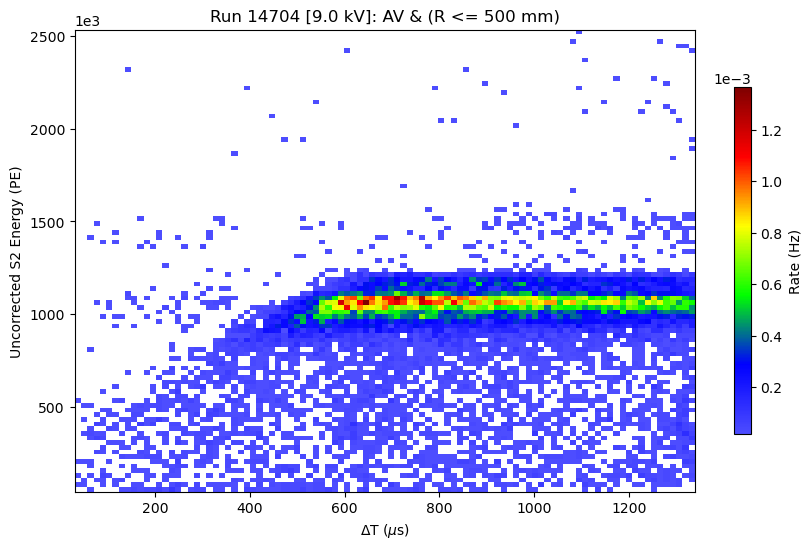

In [ ]:
# Global
rad_lim = 500
n_bins  = 100
E2_down = 775e3
E2_up   = 850e3

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E2c_LT = data[run_id]['S2e_corr_LT']
    DT     = data[run_id]['DT']
    R      = data[run_id]['R']
    
    # Masking
    rad_mask = (R <= rad_lim)
    E2c_LT_mask  = E2c_LT[AV_mask[run_id] & rad_mask]
    DT_mask      = DT[AV_mask[run_id] & rad_mask]

    # 2D histogram
    S2e_DT_map, ex, ey = pt.hist_2D(DT_mask, E2c_LT_mask, x_bins=n_bins, y_bins=n_bins)
    S2e_DT_map         = S2e_DT_map / run_long                                                       # Normalized by rate
    S2e_DT_map         = np.ma.masked_where(S2e_DT_map==0, S2e_DT_map)                               # Zero values masked
    #S2e_DT_map = np.clip(S2e_DT_map, 0, 50)                                                         # Clipped values in colorbar

#     # Preliminar fitting
#     DT_centers, median_S2e = ff.prefit_2D(ex, DT_mask, E2_mask, y_min=E2_down, y_max=E2_up)
#     # Exponential fit
#     initial_N0  = median_S2e.max()                     if len(median_S2e) > 0 else 1e5
#     initial_tau = (DT_centers[-1] - DT_centers[0]) / 2 if len(DT_centers) > 1 else 1e5
#     p0 = (initial_N0, initial_tau)
#     popt, pcov = curve_fit(ff.exponential_decay, DT_centers, median_S2e, p0=p0)
#     # Results
#     print(f'Run {run_id} fit: N0 = {popt[0]:.2f} PE, τ = {popt[1] / 1e3:.2f} ms')
#     perr = np.sqrt(np.diag(pcov))
#     fit_parameters[run_id]["S2e"] = {"CV_N0": popt[0], "Error_N0": perr[0], "CV_tau": popt[1] / 1e3, "Error_tau": perr[1] / 1e3}
    
#     fit_x = np.linspace(DT_centers.min(), DT_centers.max(), n_bins)
#     fit_y = ff.exponential_decay(fit_x, *popt)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(ex, ey, S2e_DT_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.xlabel('$\Delta$T ($\mu$s)')
    plt.ylabel('Uncorrected S2 Energy (PE)')
    #plt.ylim(0, 2000000e3)
    #plt.ylim(0.8*E2_down, 1.2*E2_up)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))    
    cbar = plt.colorbar(label='Rate (Hz)', shrink=0.75)
    cbar.formatter.set_powerlimits((0, 0))
    plt.title(f'Run {run_id} [{run_volt} kV]: AV & (R <= {rad_lim} mm)')
    # # Fit
    # plt.scatter(DT_centers, median_S2e, c='black', alpha=0.8, s=30)
    # plt.plot(fit_x, fit_y, c='gold', ls='--', lw=2)
    # plt.axhline(y=E2_up, c='red', ls='--', lw=1.0)
    # plt.axhline(y=E2_down, c='red', ls='--', lw=1.0)

    #plt.savefig(f'images/something.png', bbox_inches='tight')
    plt.show() 

Aquí comprobamos el mapa de energía de S2e_corr

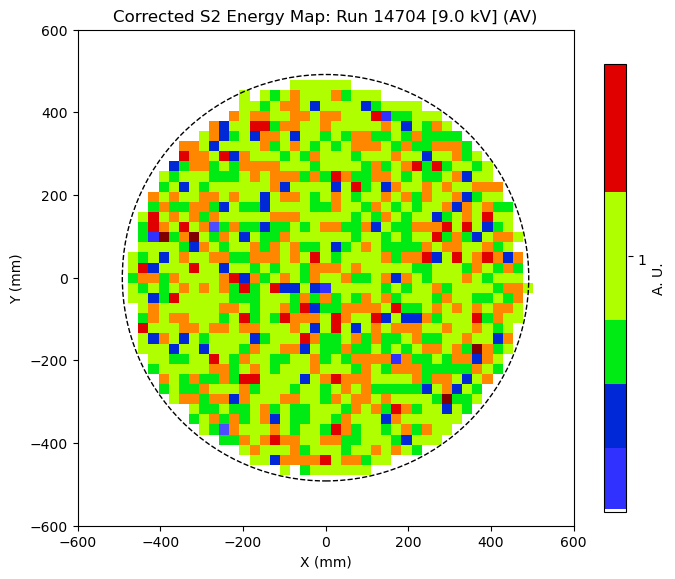

In [ ]:
# Global
n_bins  = 50

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables
    X   = data[run_id]['X']
    Y   = data[run_id]['Y']
    E2c = data[run_id]['S2e_corr']
    
    # Masking
    X_mask   = X[AV_mask[run_id]]
    Y_mask   = Y[AV_mask[run_id]]
    E2c_mask = E2c[AV_mask[run_id]]

    # Energy map
    S2e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E2c_mask, xy_bins=n_bins, norm=True)
    S2e_map         = np.ma.masked_where(S2e_map==0, S2e_map)  # Zero values masked
    #S2e_map         = np.clip(S2e_map, 0.75, 1.25)               # Clipped values in colorbar

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, S2e_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title(f'Corrected S2 Energy Map: Run {run_id} [{run_volt} kV] (AV)')

    plt.gca().add_patch(pt.plot_circle(pt.N100_rad))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

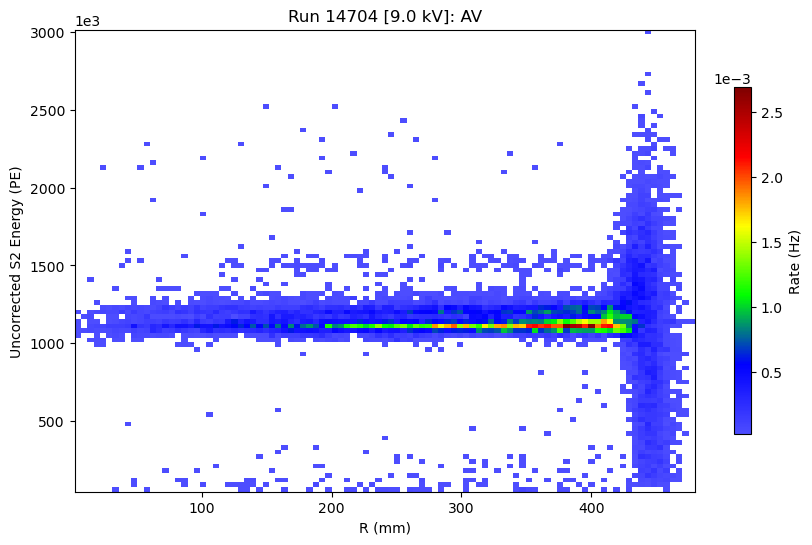

In [ ]:
# Global
rad_lim = 500
n_bins  = 100
E2_down = 775e3
E2_up   = 850e3

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E2c = data[run_id]['S2e_corr']
    R   = data[run_id]['R']
    
    # Masking
    E2c_mask = E2c[AV_mask[run_id]]
    R_mask   = R[AV_mask[run_id]]

    # 2D histogram
    S2e_R_map, ex, ey = pt.hist_2D(R_mask, E2c_mask, x_bins=n_bins, y_bins=n_bins)
    S2e_R_map         = S2e_R_map / run_long                                                       # Normalized by rate
    S2e_R_map         = np.ma.masked_where(S2e_R_map==0, S2e_R_map)                               # Zero values masked
    #S2e_DT_map = np.clip(S2e_DT_map, 0, 50)                                                         # Clipped values in colorbar

#     # Preliminar fitting
#     DT_centers, median_S2e = ff.prefit_2D(ex, DT_mask, E2_mask, y_min=E2_down, y_max=E2_up)
#     # Exponential fit
#     initial_N0  = median_S2e.max()                     if len(median_S2e) > 0 else 1e5
#     initial_tau = (DT_centers[-1] - DT_centers[0]) / 2 if len(DT_centers) > 1 else 1e5
#     p0 = (initial_N0, initial_tau)
#     popt, pcov = curve_fit(ff.exponential_decay, DT_centers, median_S2e, p0=p0)
#     # Results
#     print(f'Run {run_id} fit: N0 = {popt[0]:.2f} PE, τ = {popt[1] / 1e3:.2f} ms')
#     perr = np.sqrt(np.diag(pcov))
#     fit_parameters[run_id]["S2e"] = {"CV_N0": popt[0], "Error_N0": perr[0], "CV_tau": popt[1] / 1e3, "Error_tau": perr[1] / 1e3}
    
#     fit_x = np.linspace(DT_centers.min(), DT_centers.max(), n_bins)
#     fit_y = ff.exponential_decay(fit_x, *popt)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(ex, ey, S2e_R_map.T, cmap=pt.custom_hsv, shading='auto')
    plt.xlabel('R (mm)')
    plt.ylabel('Uncorrected S2 Energy (PE)')
    #plt.ylim(0, 2000000e3)
    #plt.ylim(0.8*E2_down, 1.2*E2_up)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))    
    cbar = plt.colorbar(label='Rate (Hz)', shrink=0.75)
    cbar.formatter.set_powerlimits((0, 0))
    plt.title(f'Run {run_id} [{run_volt} kV]: AV')
    # # Fit
    # plt.scatter(DT_centers, median_S2e, c='black', alpha=0.8, s=30)
    # plt.plot(fit_x, fit_y, c='gold', ls='--', lw=2)
    # plt.axhline(y=E2_up, c='red', ls='--', lw=1.0)
    # plt.axhline(y=E2_down, c='red', ls='--', lw=1.0)

    #plt.savefig(f'images/something.png', bbox_inches='tight')
    plt.show() 

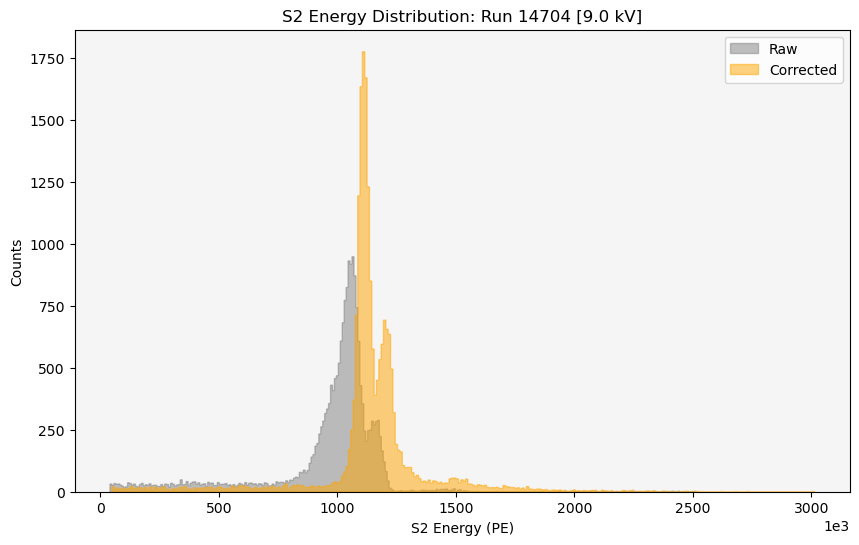

In [ ]:
# Global
rad_lim = 500
E2_min  = 500e3
E2_max  = 1000e3
n_bins  = 300
for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E2      = data[run_id]['S2e']
    E2_corr = data[run_id]['S2e_corr']
    
    # Masking
    rad_mask  = (R <= rad_lim)
    E2_mask   = E2[AV_mask[run_id] & rad_mask]
    E2c_mask  = E2_corr[AV_mask[run_id] & rad_mask]

    # Plot
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(E2_mask, bins=n_bins, histtype='stepfilled', color='grey', alpha=0.50, ec='grey', label='Raw')
    plt.hist(E2c_mask, bins=n_bins,  histtype='stepfilled', color='orange', alpha=0.50, ec='orange', label='Corrected')
    #plt.xlim(E2_min, E2_max)
    plt.xlabel('S2 Energy (PE)')
    plt.ylabel('Counts')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    plt.title(f'S2 Energy Distribution: Run {run_id} [{run_volt} kV]')
    plt.legend()

    plt.gca().set_facecolor('whitesmoke')
    #plt.grid(True)
    plt.show()

Fiteeeeeo bigauss

Run 14720 - Initial values: [200, 820000.0, 1000.0, 50, 900000.0, 1000.0]
Run 14720 - Final values: [2.10603452e+02 8.21724305e+05 1.38068574e+04 7.48973650e+01
 9.00133153e+05 1.45887819e+04]


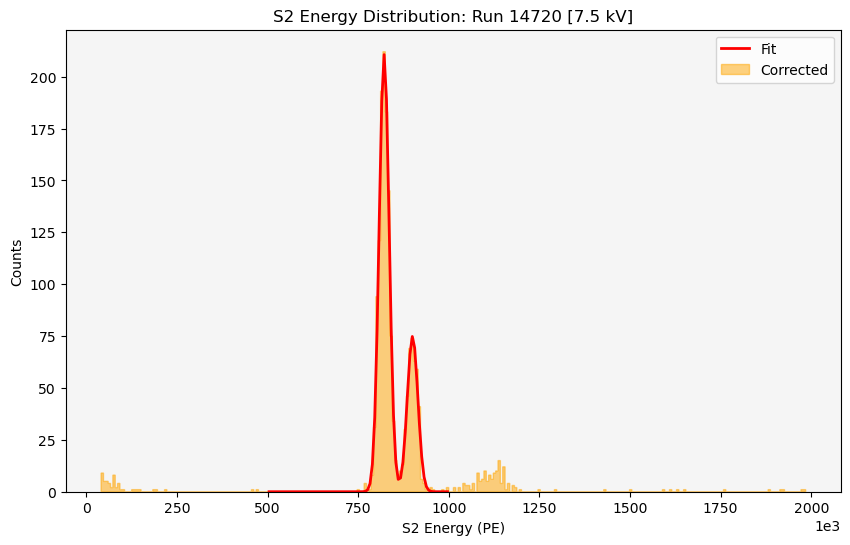

In [ ]:
# Global
rad_lim  = 200
E2_min   = 500e3
E2_max   = 1000e3
n_bins = 300

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # S2 corrected
    E2_corr  = data[run_id]['S2e_corr_LT']
    R  = data[run_id]['R']
    
    # Masking
    rad_mask = (R <= rad_lim)  
    #fit_lim  = (E2_min < E2_corr) & (E2_corr < E2_max)
    E2c_mask = E2_corr[AV_mask[run_id] & rad_mask ]                                # Active volume supremacy IT SHOULD NOT DEPEND ON RADII!
    #E2c_mask = E2c_mask[fit_lim & rad_mask]                                           
    
    # Store the corrected S2e data into a histogram
    plt.figure(figsize=(10, 6))
    E2c_counts, E2c_bins, _ = plt.hist(E2c_mask, bins=n_bins, histtype='stepfilled', color='orange', alpha=0.50, ec='orange', label='Corrected')
    
    # Prefit
    E2c_centers, E2c_values = ff.prefit_1D(E2c_bins, E2c_mask, E2c_counts, x_min=E2_min, x_max=E2_max)
    # Guess the initial parameter values and fit
    #p0 = ff.bigauss_initials(E2c_mask, fit_bins, peak_threshold=1e-2)
    p0 = [200, 820e3, 1e3, 50, 900e3, 1e3]
    print(f'Run {run_id} - Initial values: {p0}')
    popt, pcov = curve_fit(ff.bigauss_func, E2c_centers, E2c_values, p0=p0)
    # Results
    print(f'Run {run_id} - Final values: {popt}') #:.2f
    # perr = np.sqrt(np.diag(pcov))
    # print(perr)
    # E2_parameters[run_id]["222Rn"] = {"CV_mu": popt[1], "Error_mu": perr[1], "CV_sigma": popt[2], "Error_sigma": perr[2]}
    
    fit_y = ff.bigauss_func(E2c_centers, *popt)
    
    # Plot
    #plt.figure(figsize=(10, 6))
    #plt.stairs(E2c_counts, E2c_edges, fill=True, alpha=0.5, color="orange", ec='orange', label="Corrected")
    plt.plot(E2c_centers, fit_y, color="red", lw=2, label="Fit")
    plt.xlabel('S2 Energy (PE)')
    plt.ylabel('Counts')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    plt.title(f'S2 Energy Distribution: Run {run_id} [{run_volt} kV]')
    plt.legend()

    plt.gca().set_facecolor('whitesmoke')
    #plt.grid(True)
    plt.show()